In [8]:
import numpy as np
import numpy.random as nr
import pandas as pd
from pandas import DataFrame, Series
from IPython.display import Image 
from io import StringIO
import pydotplus
from sklearn import preprocessing
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import metrics
import sklearn.model_selection as ms
import sklearn.metrics as sklm
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [2]:
data = pd.read_csv('CTG.csv')
data.head()
data = data.dropna()
print(data.shape)
print(list(data.columns))

(2126, 22)
['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance', 'Tendency', 'NSP']


## Counting the three cases. 

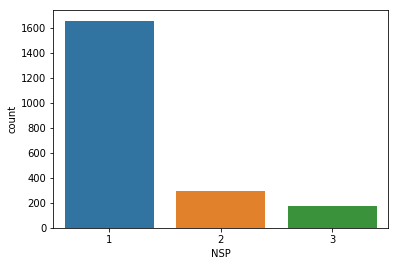

In [3]:
sns.countplot(x = 'NSP', data = data)  

## Creating the dataframe.

In [4]:
X = data.loc[:, data.columns !='NSP']
y = data.NSP -1

## Splitting the dataset.

In [5]:
#Data Partition
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 55) 
yt = y_test

In [6]:
#Standardize the dataset by subtracting the mean and dividing bythe standard deviation (i.e. we use the z-score method)
mean = X_train.mean(axis = 0)   #This ensures we calculate mean along the columns
X_train -= mean
s = X_train.std(axis = 0)
X_train /= s

X_test -= mean      #We normalize the test data using the mean and standard deviation of the train data
X_test /= s

## Compute and Predict the Decision Tree model. 

In [7]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test) 

## Accuracy of the model. 

In [9]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) 

Accuracy: 0.931924882629108


## Now we plot the Decision Tree. 

In [10]:
! pip install graphviz
! pip install pydotplus

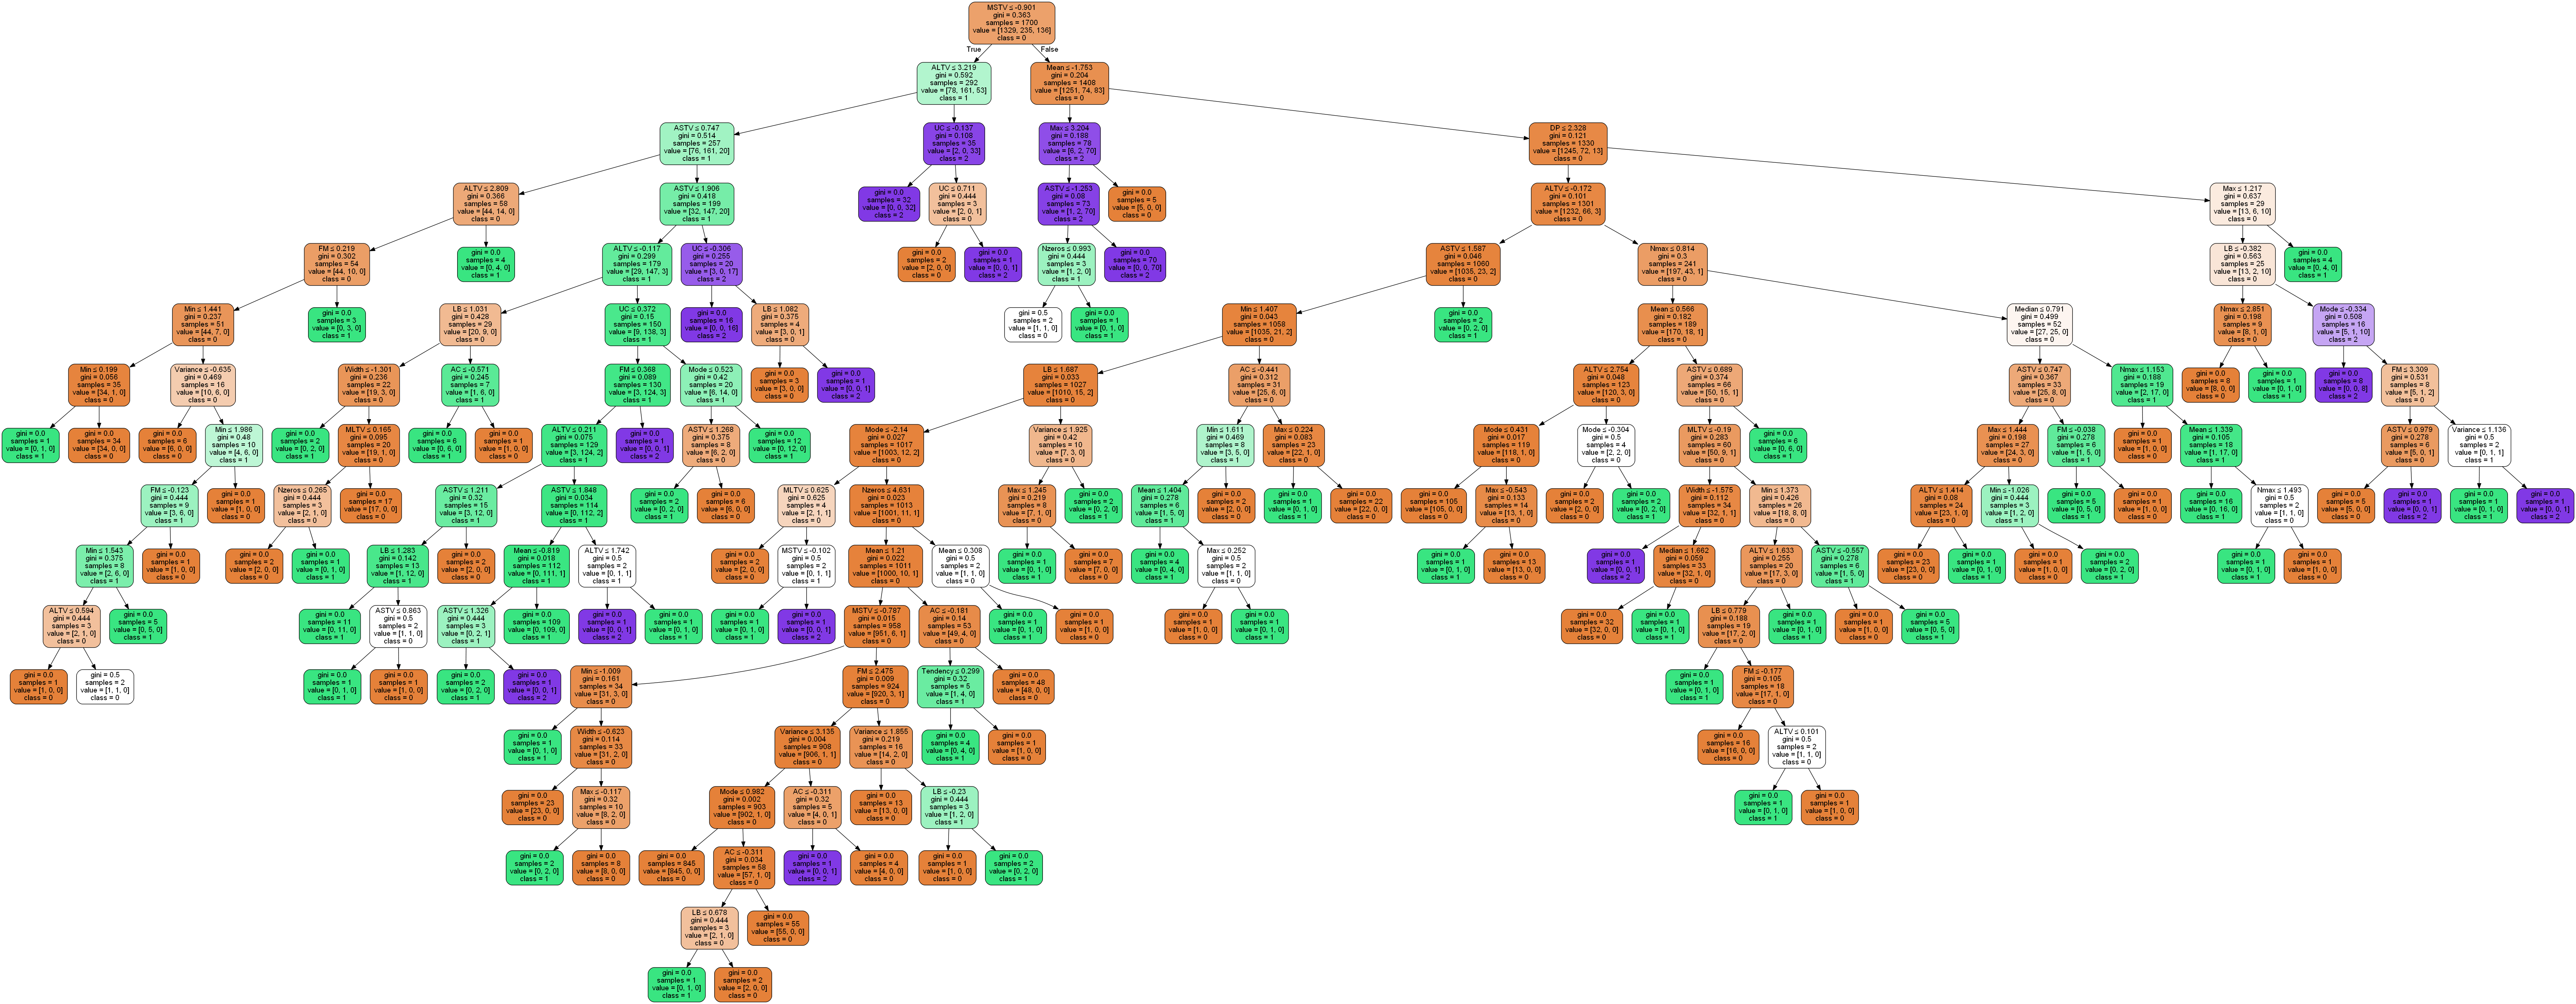

In [11]:
feature_cols = ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance', 'Tendency']

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('NSP.png')
Image(graph.create_png())